In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
amazon_sales = pd.read_csv('amazon.csv')

I got this dataset from kaggle 

Sources: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset?resource=download

# Data Cleaning and Preparation

The methods used to clean and prepare the data are as listed below:
1. Convert Data Types
2. Filling Missing Data
3. Checking Duplicates Data
4. Creating New Columns

In [3]:
amazon_sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
amazon_sales.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [5]:
amazon_sales.shape

(1465, 16)

In [6]:
amazon_sales.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

The price being used in Indian Rupee

In [7]:
# Convert the data type of actual_price and discounted_price 
# And replace "₹" and "," so that we can convert it to float

amazon_sales["actual_price"] = amazon_sales["actual_price"].str.replace("₹", "")
amazon_sales["actual_price"] = amazon_sales["actual_price"].str.replace(",", "")
amazon_sales["actual_price"] = amazon_sales["actual_price"].astype("float64")

amazon_sales["discounted_price"] = amazon_sales["discounted_price"].str.replace("₹", "")
amazon_sales["discounted_price"] = amazon_sales["discounted_price"].str.replace(",", "")
amazon_sales["discounted_price"] = amazon_sales["discounted_price"].astype("float64")

In [8]:
# Convert the data type of discount_percentage and changing the value to get more easy understanding

amazon_sales["discount_percentage"] = (amazon_sales["discount_percentage"]
                                       .str.replace("%", "")
                                       .astype("float64"))

amazon_sales["discount_percentage"] = amazon_sales["discount_percentage"] / 100 
amazon_sales["discount_percentage"]

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [9]:
#let's checking the rating column if there's unsual string in the column
amazon_sales["rating"].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [10]:
#get the row of that unsual string 
amazon_sales[amazon_sales["rating"] == "|"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


When I look at amazon page of this row, it turns out that this product has 4 stars rating and not |. So I'm planning to give this product rating of 4.0 as well.

Source: https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1

In [11]:
amazon_sales["rating"] = amazon_sales["rating"].str.replace("|", "4.0", regex=False)

amazon_sales["rating"] = amazon_sales["rating"].astype("float64")

In [12]:
# Checking if the unsual string has changed to 4.0
amazon_sales[amazon_sales["product_id"] == "B08L12N5H1"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,4.0,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [13]:
# Checking if any missing values

amazon_sales.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [14]:
# Checking the those two row that have missing values,
# so we can take look at amazon page to find the missing values 

NaN_data = amazon_sales[amazon_sales.isna().any(axis=1)]
NaN_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


I checked the first row and found that it has 15 ratings count, so I plan to fill the missing value with 15. However, for the second row, I couldn't access the Amazon page to check the actual value, so I decided to drop the row.

Sources: https://www.amazon.in/Amazon-Brand-Charging-Suitable-Supported/dp/B0B94JPY2N

In [15]:
#Changing rating_count Column Data Type first 

amazon_sales['rating_count'] = amazon_sales['rating_count'].str.replace(',', '').astype('float64')

In [16]:
missing_indices = amazon_sales[amazon_sales['rating_count'].isna()].index

# Fill the missing value in the first row with 15

amazon_sales.loc[missing_indices[0], 'rating_count'] = 15.0

# Drop the missing values in the second row

amazon_sales.drop(missing_indices[1], inplace=True)

In [17]:
# Make sure that the first row has been filled

amazon_sales[amazon_sales["product_id"]== "B0B94JPY2N"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.8,3.0,15.0,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...


In [18]:
#Checking for Duplicates

amazon_sales.duplicated().sum()

0

In [19]:
# Creating a new DataFrame with Selected Column and not including columns that are not necessary for analysis
amazon_sales2 = amazon_sales[['product_id', 'product_name', 'category', 'discounted_price', 
                              'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [20]:
# Creating new category columns
category_split = amazon_sales2["category"].str.split("|", expand=True)
category_split

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [21]:
amazon_sales2["main_category"] = category_split[0]
amazon_sales2["sub_category"] = category_split[1]

In [22]:
amazon_sales2.drop("category", axis=1, inplace=True)

In [23]:
amazon_sales2.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,main_category,sub_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals


In [24]:
amazon_sales2["main_category"].value_counts()

Electronics              526
Computers&Accessories    452
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: main_category, dtype: int64

In [25]:
# Fixing these strings in the main_category column to look more better
amazon_sales2["main_category"] = amazon_sales2["main_category"].str.replace("&", " & ")
amazon_sales2["main_category"] = amazon_sales2["main_category"].str.replace("HomeImprovement", "Home Improvement")
amazon_sales2["main_category"] = amazon_sales2["main_category"].str.replace("OfficeProducts", "Office Products")
amazon_sales2["main_category"] = amazon_sales2["main_category"].str.replace("MusicalInstruments", "Musical Instruments")

In [26]:
amazon_sales2["sub_category"].value_counts()

Accessories&Peripherals                    380
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Microphones  

In [27]:
# Fixing these strings in the sub_category column to look more better

amazon_sales2["sub_category"] = amazon_sales2["sub_category"].str.replace(",", ", ")
amazon_sales2["sub_category"] = amazon_sales2["sub_category"].str.replace("&", " & ")
amazon_sales2["sub_category"] = (amazon_sales2["sub_category"]
                                 .apply(lambda x: re.sub(r'(?<=[a-z])(?=[A-Z])|(?<=\S)(,|&)(?=\S)', " ", x)))

# alternative code
# amazon_sales2["sub_category"] = amazon_sales2["sub_category"].str.replace("WearableTechnology", "Wearable Technology")
# amazon_sales2["sub_category"] = amazon_sales2["sub_category"].str.replace("NetworkingDevices", "Networking Devices")
# amazon_sales2["sub_category"] = amazon_sales2["sub_category"].str.replace("OfficePaperProducts", "Office Paper Products")
# amazon_sales2["sub_category"] = amazon_sales2["sub_category"].str.replace("OfficePaperProducts", "Office Paper Products")

In [28]:
#creating the differnce price between Actual Price and Discounted Price

amazon_sales2["price_gap"] = amazon_sales2['actual_price'] - amazon_sales2['discounted_price']

In [29]:
#Creating Categories for Rankings

categories_rating = []
for rating in amazon_sales2["rating"]:
    if rating < 2.0:
        categories_rating.append("Poor")
    elif rating < 3.0:
        categories_rating.append("Below Average")
    elif rating < 4.0:
        categories_rating.append("Average")
    elif rating < 5.0:
        categories_rating.append("Above Average")
    else:
        categories_rating.append("Excellent")

amazon_sales2["rating_category"] = categories_rating
amazon_sales2["rating_category"] = amazon_sales2["rating_category"].astype("category")

In [30]:
amazon_sales2['rating_category'] = amazon_sales2['rating_category'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [31]:
# Checking a dataframe after all the cleaning and preparation process 

amazon_sales2.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,main_category,sub_category,price_gap,rating_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,700.0,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,150.0,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,1700.0,Average
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,370.0,Above Average
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,245.0,Above Average


In [32]:
# Making a new datafram that contain user_id and user_name

amazon_id = amazon_sales[["user_id","user_name"]]
amazon_id.head()

,user_id,user_name
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."


In [33]:
# Creating user_id to display 1 id for each row

amazon_id_split = amazon_id["user_id"].str.split(",", expand=False)
amazon_id_split = amazon_id_split.explode()
amazon_id_clean = amazon_id_split.reset_index(drop=True)
amazon_id_clean

0        AG3D6O4STAQKAY2UVGEUV46KN35Q
1        AHMY5CWJMMK5BJRBBSNLYT3ONILA
2        AHCTC6ULH4XB6YHDY6PCH2R772LQ
3        AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4        AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
                     ...             
11497    AHXCDNSXAESERITAFELQABFVNLCA
11498    AGRZD6CHLCUNOLMMIMIHUCG7PIFA
11499    AFQZVGSOSOJHKFQQMCEI4725QEKQ
11500    AEALVGXXIP46OZVXKRUXSDWZJMEA
11501    AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ
Name: user_id, Length: 11502, dtype: object

In [34]:
# Creating user_name to display 1 name for each row

amazon_name = amazon_id["user_name"].str.split(",", expand=False)
amazon_name = amazon_name.explode()
amazon_name_clean = amazon_name.reset_index(drop=True)

amazon_name_clean

0                   Manav
1            Adarsh gupta
2                 Sundeep
3          S.Sayeed Ahmed
4          jaspreet singh
               ...       
11509             PARDEEP
11510    Anindya Pramanik
11511         Vikas Singh
11512     Harshada Pimple
11513              Saw a.
Name: user_name, Length: 11514, dtype: object

In [35]:
# Turn those amazon_id_clean and amazon_name_clean into a datframe

df1 = pd.DataFrame(data=amazon_id_clean)
df2 = pd.DataFrame(data=amazon_name_clean)

In [36]:
# Merged these 2 DataFrame

amazon_id_name = pd.merge(df1, df2, left_index=True, right_index=True)

In [37]:
# Checking a new DataFrame for user_id and user_name

amazon_id_name.head()

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh


# Exploratory Data Analysis

## Product Category Analyze

### Most Amount of Products by Category

In [38]:
main_items = (amazon_sales2.groupby('main_category').size()
 .reset_index(name='counts').sort_values("counts", ascending=False).head())
main_items

,main_category,counts
2,Electronics,526
1,Computers & Accessories,452
4,Home & Kitchen,448
7,Office Products,31
5,Home Improvement,2


In [39]:
sub_items = (amazon_sales2.groupby('sub_category').size()
 .reset_index(name='counts').sort_values("counts", ascending=False).head())
sub_items

,sub_category,counts
1,Accessories & Peripherals,380
17,Kitchen & Home Appliances,308
15,"Home Theater, TV & Video",162
20,Mobiles & Accessories,161
11,"Heating, Cooling & Air Quality",116


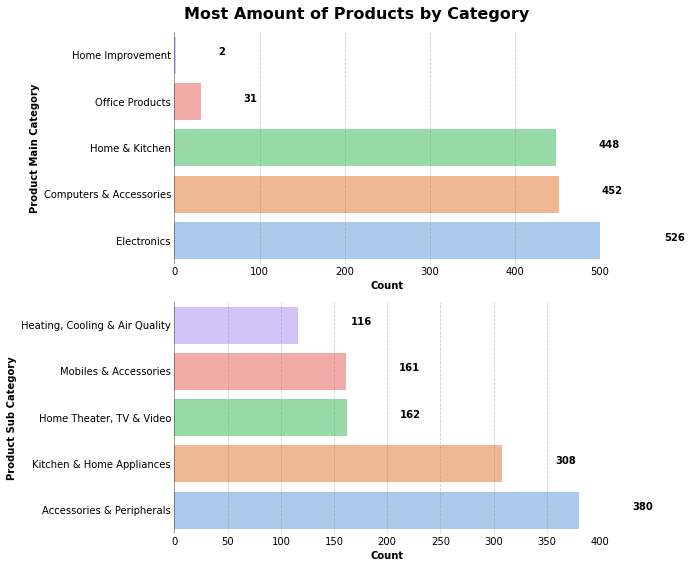

In [40]:
# Set up figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Most Amount of Products by Category', fontsize=16, fontweight='bold')

# Add color
colors = sns.color_palette("pastel", len(main_items))
sns.barplot(ax=ax[0], data=main_items, x='counts', y='main_category', palette=colors)

# Add annotations
for i, v in enumerate(main_items['counts']):
    ax[0].text(v + 50, i, str(v), color='black', fontweight='bold')
ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_xlim(right=500)
ax[0].invert_yaxis()

# Add color
colors = sns.color_palette("pastel", len(sub_items))
sns.barplot(ax=ax[1], data=sub_items, x='counts', y='sub_category', palette=colors)

# Add annotations
for i, v in enumerate(sub_items['counts']):
    ax[1].text(v + 50, i, str(v), color='black', fontweight='bold')
ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Product Sub Category', fontweight='bold')
ax[1].set_xlim(right=400)
ax[1].invert_yaxis()

# Add horizontal lines for easier comparison
for axis in ax:
    axis.grid(True, axis='x', linestyle='--', color='gray', alpha=0.4)
    for i in axis.spines.values():
        i.set_visible(False)
    axis.tick_params(axis='y', which='both', length=0)
    axis.tick_params(axis='x', which='both', length=0)
    axis.axvline(x=axis.get_xlim()[0], color='black', linewidth=1.5, alpha=0.4)
    
plt.tight_layout()
plt.show()

## Product Pricing Analyze

### What is the average discount percentage for products in each main category and sub category?

In [41]:
avg_discount_by_category = amazon_sales2.groupby('main_category')[['discount_percentage']].mean()
avg_discount_by_category

,discount_percentage
main_category,
Car & Motorbike,0.420000
Computers & Accessories,0.539779
Electronics,0.508289
Health & PersonalCare,0.530000
Home & Kitchen,0.401205
Home Improvement,0.575000
Musical Instruments,0.460000
Office Products,0.123548
Toys & Games,0.000000


In [42]:
avg_discount_sub_category = amazon_sales2.groupby('sub_category')[['discount_percentage']].mean()
avg_discount_sub_category

,discount_percentage
sub_category,
Accessories,0.577857
Accessories & Peripherals,0.559289
Arts & Crafts,0.000000
Cameras & Photography,0.475625
Car Accessories,0.420000
Components,0.546000
Craft Materials,0.084286
Electrical,0.575000
External Devices & Data Storage,0.468889


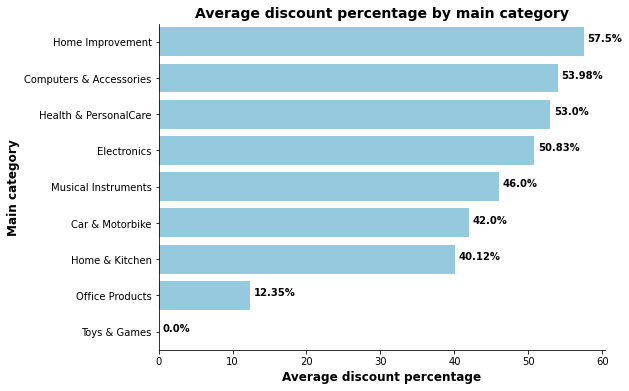

In [43]:
# Calculate the average discount percentage by main category
avg_discount_by_category = amazon_sales2.groupby('main_category')[['discount_percentage']].mean()
avg_discount_by_category *= 100

# Sort the categories by the average discount percentage
avg_discount_by_category = avg_discount_by_category.sort_values('discount_percentage', ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='discount_percentage', y=avg_discount_by_category.index, data=avg_discount_by_category, color='skyblue')

# Add labels and a title
ax.set_xlabel('Average discount percentage', fontsize=12, fontweight='bold')
ax.set_ylabel('Main category', fontsize=12, fontweight='bold')
ax.set_title('Average discount percentage by main category', fontsize=14, fontweight='bold')

# Add the percentage values as annotations to the bars
for i, v in enumerate(avg_discount_by_category['discount_percentage']):
    ax.text(v + 0.5, i, str(round(v, 2)) + '%', fontsize=10, fontweight='bold')

# Remove the box around the plot
sns.despine()

plt.show()



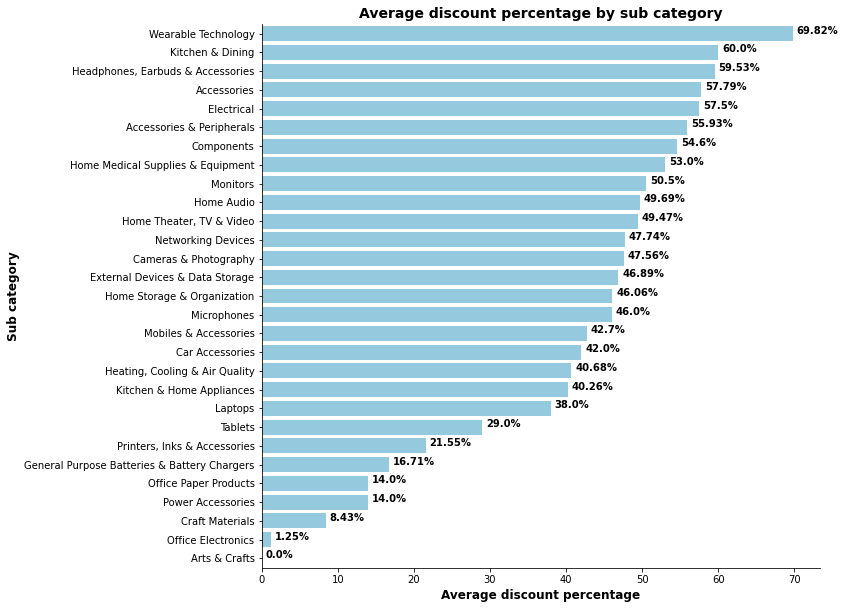

In [44]:
avg_discount_sub_category = amazon_sales2.groupby('sub_category')[['discount_percentage']].mean()
avg_discount_sub_category *= 100

# Sort the categories by the average discount percentage
avg_discount_sub_category = avg_discount_sub_category.sort_values('discount_percentage', ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='discount_percentage', y=avg_discount_sub_category.index, data=avg_discount_sub_category, color='skyblue')

# Add labels and a title
ax.set_xlabel('Average discount percentage', fontsize=12, fontweight='bold')
ax.set_ylabel('Sub category', fontsize=12, fontweight='bold')
ax.set_title('Average discount percentage by sub category', fontsize=14, fontweight='bold')

# Add the percentage values as annotations to the bars
for i, v in enumerate(avg_discount_sub_category['discount_percentage']):
    ax.text(v + 0.5, i, str(round(v, 2)) + '%', fontsize=10, fontweight='bold')

# Remove the box around the plot
sns.despine()

plt.show()

### 5 Most Discounted Expensive Products

In [45]:
expensive_product_discounted = amazon_sales2.groupby(["product_name"])[["discounted_price"]].sum().sort_values("discounted_price", ascending=False).reset_index().head()
expensive_product_discounted

,product_name,discounted_price
0,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,77990.0
1,OnePlus 163.8 cm (65 inches) U Series 4K LED S...,61999.0
2,VU 164 cm (65 inches) The GloLED Series 4K Sma...,54990.0
3,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,47990.0
4,Samsung 138 cm (55 inches) Crystal 4K Neo Seri...,47990.0


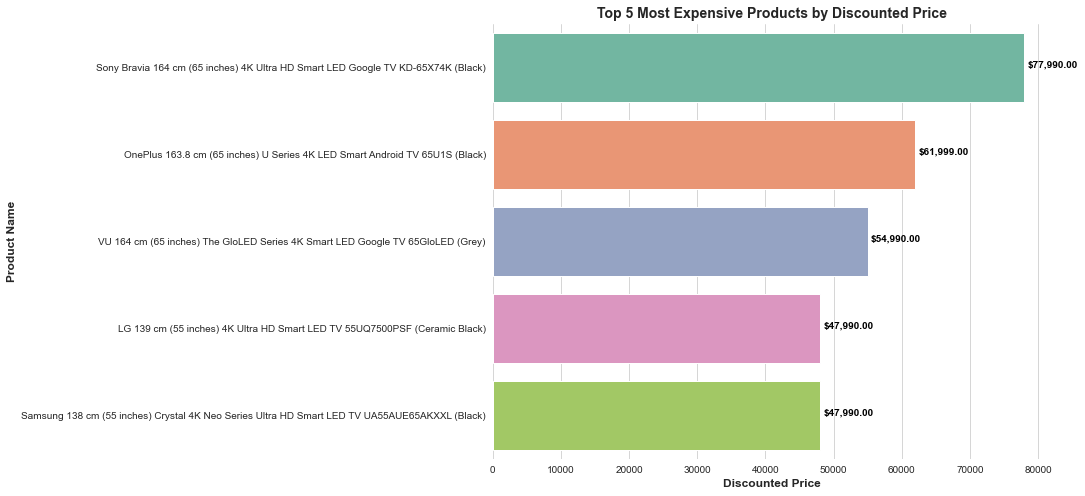

In [46]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("pastel", len(expensive_product_discounted))
sns.barplot(x='discounted_price', y='product_name', data=expensive_product_discounted, palette="Set2")

# Add labels and title to the chart
ax.set_xlabel("Discounted Price", fontsize=12, fontweight='bold')
ax.set_ylabel("Product Name", fontsize=12, fontweight='bold')
ax.set_title("Top 5 Most Expensive Products by Discounted Price", fontsize=14, fontweight='bold')

# Add annotations to the chart
for i, v in enumerate(expensive_product_discounted['discounted_price']):
    ax.text(v + 500, i, "${:,.2f}".format(v), color='black', fontweight='bold', fontsize=10)

sns.set_style("white")
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

### 5 Most Discounted Cheapest Product

In [47]:
cheapest_product_discounted = amazon_sales2.groupby(["product_name"])[["discounted_price"]].sum().sort_values("discounted_price",ascending=True).reset_index().head()
cheapest_product_discounted 

,product_name,discounted_price
0,GIZGA essentials Universal Silicone Keyboard P...,39.00
1,Inventis 5V 1.2W Portable Flexible USB LED Lig...,39.00
2,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,39.00
3,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,50.00
4,FLiX (Beetel Flow USB to Micro USB PVC Data Sy...,57.89


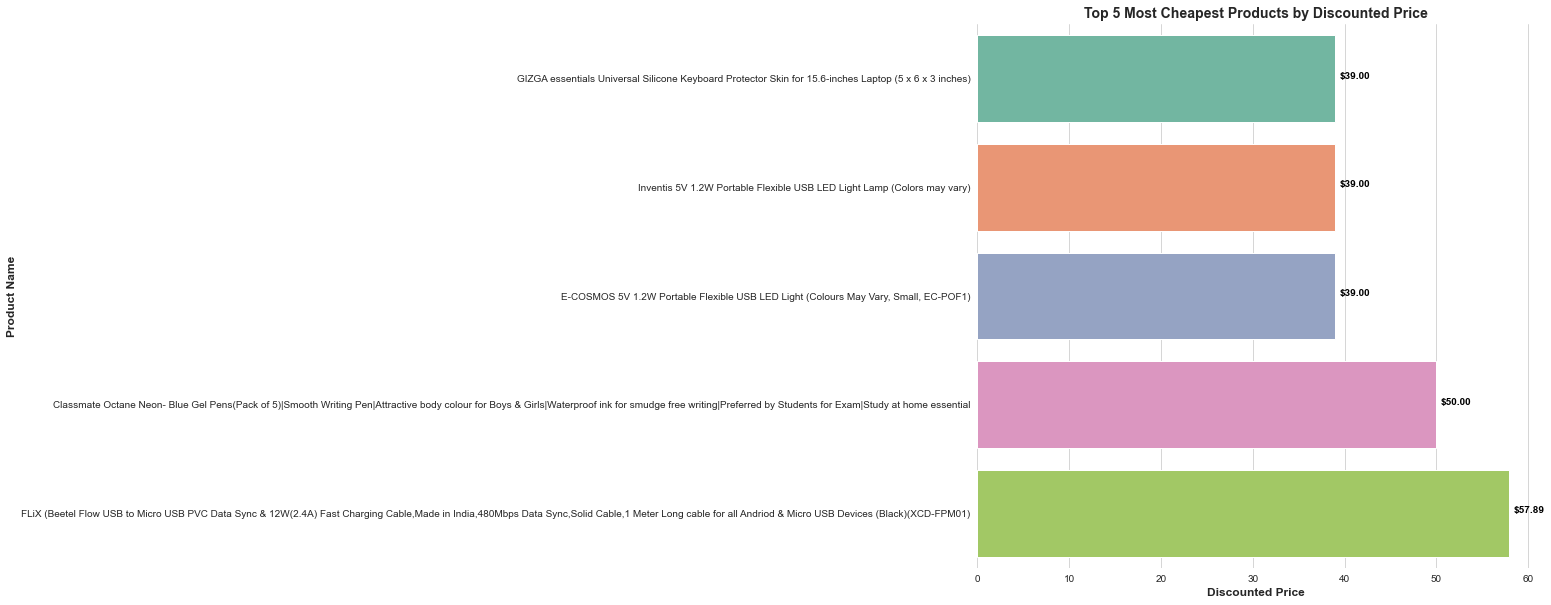

In [48]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 10))
colors = sns.color_palette("pastel", len(expensive_product_discounted))
sns.barplot(x='discounted_price', y='product_name', data=cheapest_product_discounted, palette="Set2")

ax.set_xlabel("Discounted Price", fontsize=12, fontweight='bold')
ax.set_ylabel("Product Name", fontsize=12, fontweight='bold')
ax.set_title("Top 5 Most Cheapest Products by Discounted Price", fontsize=14, fontweight='bold')

for i, v in enumerate(cheapest_product_discounted['discounted_price']):
    ax.text(v + 0.5, i, "${:,.2f}".format(v), color='black', fontweight='bold', fontsize=10)


    
sns.set_style("white")
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

### Distribution of Actual Price

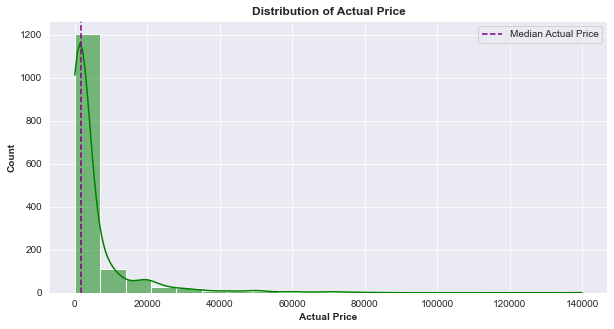

In [49]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))

# create the histogram with a density plot
sns.histplot(data= amazon_sales2, x='actual_price', bins= 20, kde=True, color='green', alpha=0.5)

# add annotations for mean and median ratings

median_rating = amazon_sales2['actual_price'].median()

plt.axvline(median_rating, color='purple', linestyle='--', label='Median Actual Price')
plt.legend()

# set the labels for the plot
ax.set_title('Distribution of Actual Price', fontweight='bold')
ax.set_xlabel('Actual Price', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')

# change color palette
palette = sns.color_palette('coolwarm')
sns.set_palette(palette)

# display the plot
plt.show()

### Distribution of Discounted Price

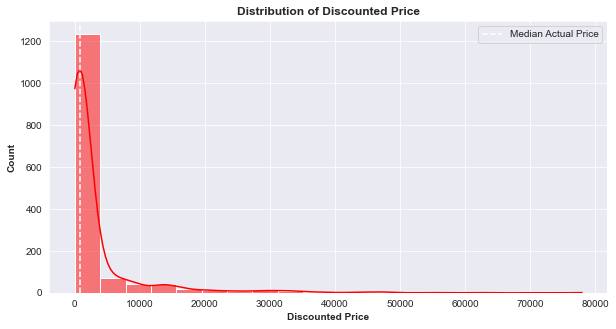

In [50]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))

# create the histogram with a density plot
sns.histplot(data= amazon_sales2, x='discounted_price', bins= 20, kde=True, color='red', alpha=0.5)

# add annotations for mean and median ratings

median_rating = amazon_sales2['discounted_price'].median()

plt.axvline(median_rating, color='white', linestyle='--', label='Median Actual Price')
plt.legend()

# set the labels for the plot
ax.set_title('Distribution of Discounted Price', fontweight='bold')
ax.set_xlabel('Discounted Price', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')

# change color palette
palette = sns.color_palette('coolwarm')
sns.set_palette(palette)

# display the plot
plt.show()

### Exploring the Price Range of Main and Sub Category through Actual and Discounted Prices

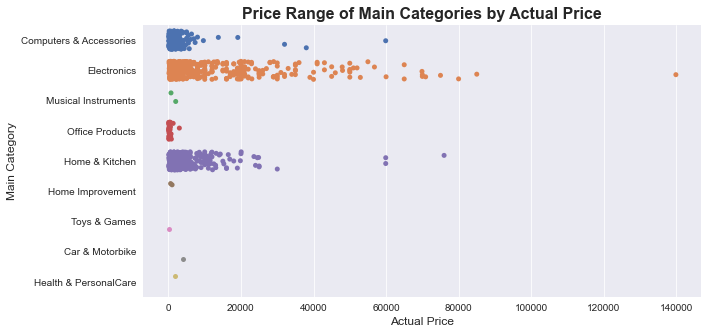

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style = 'whitegrid')  

sns.stripplot(ax =ax, data = amazon_sales2, y = 'main_category', x= 'actual_price', jitter =0.3)

ax.set_title("Price Range of Main Categories by Actual Price", fontsize=16, fontweight="bold")
ax.set_xlabel("Actual Price", fontsize=12) 
ax.set_ylabel("Main Category", fontsize=12)

sns.despine(left=True)
plt.show()

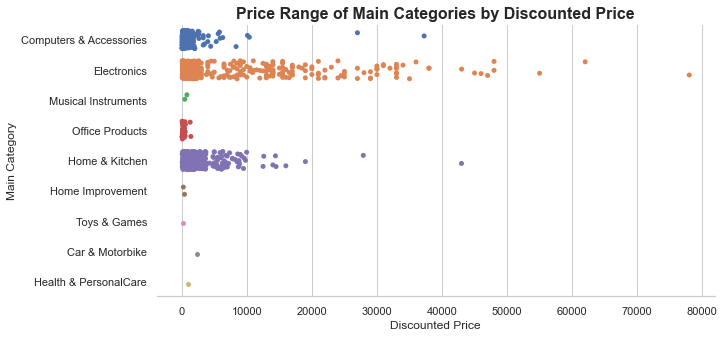

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style = 'whitegrid')  

sns.stripplot(ax =ax, data = amazon_sales2, y = 'main_category', x= 'discounted_price', jitter =0.3)

ax.set_title("Price Range of Main Categories by Discounted Price", fontsize=16, fontweight="bold")
ax.set_xlabel("Discounted Price", fontsize=12)
ax.set_ylabel("Main Category", fontsize=12)

sns.despine(left=True)
plt.show()

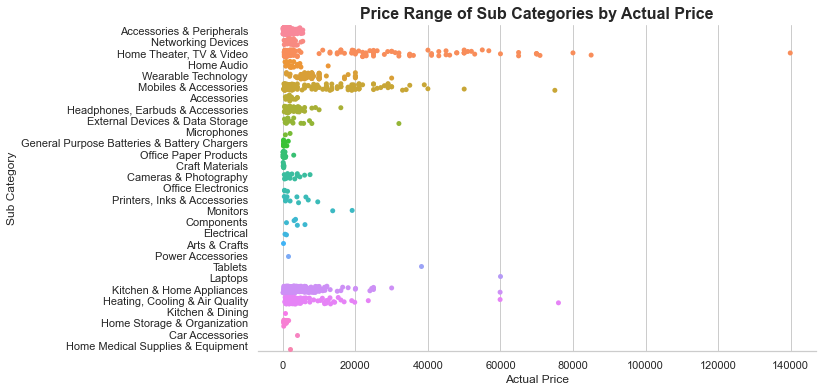

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = 'whitegrid')  

sns.stripplot(ax =ax, data = amazon_sales2, y = 'sub_category', x= 'actual_price', jitter =0.3)

ax.set_title("Price Range of Sub Categories by Actual Price", fontsize=16, fontweight="bold")
ax.set_xlabel("Actual Price", fontsize=12)
ax.set_ylabel("Sub Category", fontsize=12)

sns.despine(left=True)
plt.show()

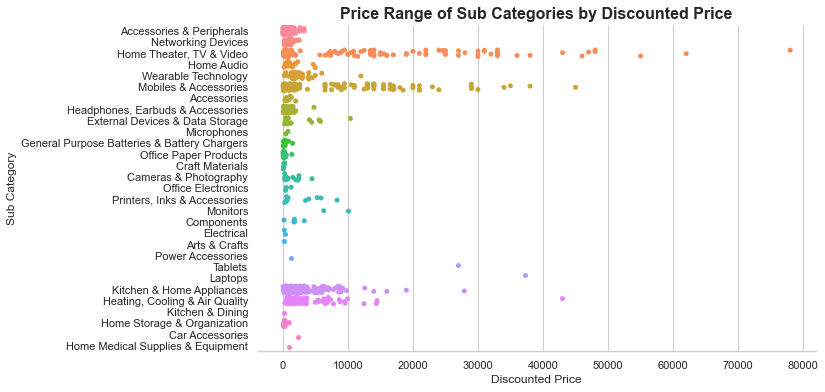

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = 'whitegrid')  

sns.stripplot(ax =ax, data = amazon_sales2, y = 'sub_category', x= 'discounted_price', jitter =0.3)

ax.set_title("Price Range of Sub Categories by Discounted Price", fontsize=16, fontweight="bold")
ax.set_xlabel("Discounted Price", fontsize=12)
ax.set_ylabel("Sub Category", fontsize=12)

sns.despine(left=True)
plt.show()

## Product Ratings Analysis

### Rating and Rating Count Distribution

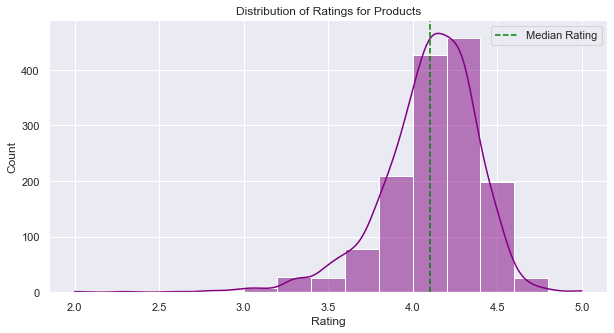

In [55]:
# set the style of the plot
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))

# create the histogram with a density plot
sns.histplot(data= amazon_sales2, x='rating', bins=15, kde=True, color='purple', alpha=0.5)

# add annotations for mean and median ratings

median_rating = amazon_sales2['rating'].median()

plt.axvline(median_rating, color='green', linestyle='--', label='Median Rating')
plt.legend()

# set the labels for the plot
ax.set_title('Distribution of Ratings for Products')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# change color palette
palette = sns.color_palette('coolwarm')
sns.set_palette(palette)

# display the plot
plt.show()


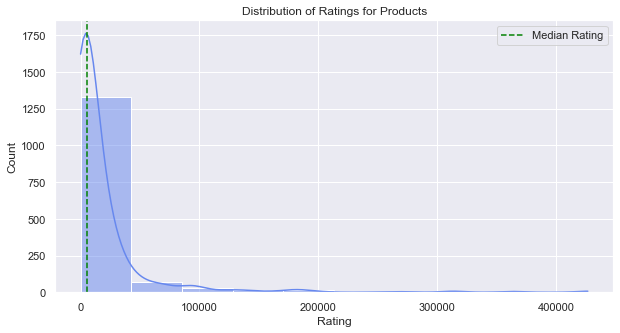

In [56]:
# set the style of the plot
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))

# create the histogram with a density plot
sns.histplot(data= amazon_sales2, x='rating_count', bins=10, kde=True, palette='husl', alpha=0.5)

# add annotations for mean and median ratings

median_rating = amazon_sales2['rating_count'].median()

plt.axvline(median_rating, color='green', linestyle='--', label='Median Rating')
plt.legend()

# set the labels for the plot
ax.set_title('Distribution of Ratings for Products')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# change color palette
palette = sns.color_palette('coolwarm')
sns.set_palette(palette)

# display the plot
plt.show()


### Rating Percentage of All Products

In [57]:
rating_category_products = amazon_sales2["rating_category"].value_counts(normalize=True) * 100
print(rating_category_products)



Above Average    75.683060
Average          23.770492
Below Average     0.409836
Excellent         0.136612
Name: rating_category, dtype: float64


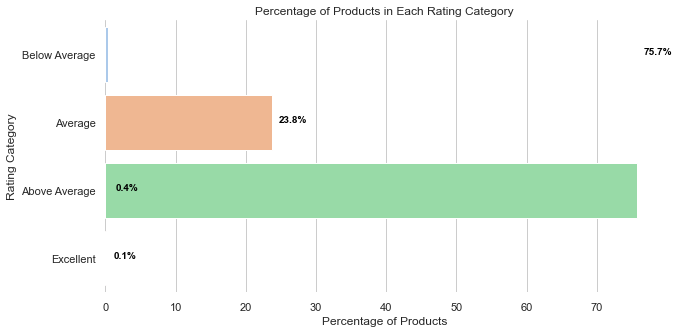

In [58]:
sns.set_style('whitegrid')
colors = sns.color_palette("pastel", len(main_items))
fig, ax = plt.subplots(figsize=(10, 5))

# calculate the percentage of products in each rating category
rating_category_products = amazon_sales2["rating_category"].value_counts(normalize=True) * 100

# create a horizontal bar plot using Seaborn
sns.barplot(x=rating_category_products.values, y=rating_category_products.index, palette=colors)
ax.set_xlabel('Percentage of Products')
ax.set_ylabel('Rating Category')
ax.set_title('Percentage of Products in Each Rating Category')

# add annotations to the plot
for i, v in enumerate(rating_category_products.values):
    ax.text(v + 1, i, "{:.1f}%".format(v), color='black', fontweight='bold', fontsize=10)

sns.set_style("white")
sns.despine(left=True, bottom=True)
plt.show()

### Top Main Category by Rating

In [59]:
top_main_rating = amazon_sales2.groupby(["main_category"])[["rating"]].mean().sort_values("rating",ascending=False).head(10).reset_index()
top_main_rating

,main_category,rating
0,Office Products,4.309677
1,Toys & Games,4.300000
2,Home Improvement,4.250000
3,Computers & Accessories,4.153097
4,Electronics,4.081749
5,Home & Kitchen,4.040625
6,Health & PersonalCare,4.000000
7,Musical Instruments,3.900000
8,Car & Motorbike,3.800000


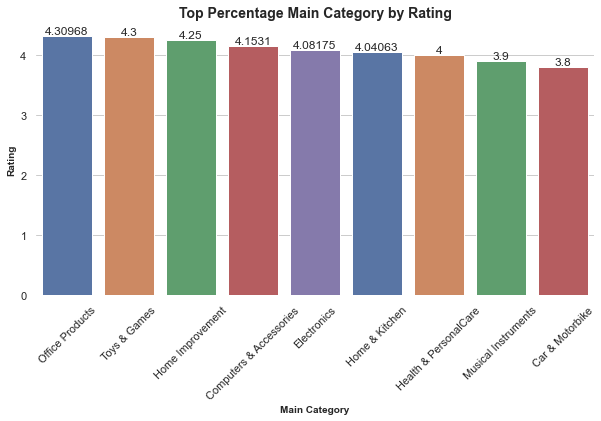

In [60]:
sns.set_style('whitegrid')
colors = sns.color_palette("deep", len(main_items))
fig, ax = plt.subplots(figsize=(10, 5))

# create a horizontal bar plot using Seaborn
barplot = sns.barplot(data=top_main_rating, x="main_category", y="rating", palette=colors)
ax.set_xlabel('Main Category',  fontweight='bold', fontsize=10)
ax.set_ylabel('Rating',  fontweight='bold', fontsize=10)
ax.set_title('Top Percentage Main Category by Rating',  fontweight='bold', fontsize=14)

# add annotations to the plot
barplot.bar_label(barplot.containers[0])

plt.xticks(rotation=45)
sns.set_style("white")
sns.despine(left=True, bottom=True)
plt.show()



### Top Sub Category by Rating

In [61]:
top_sub_rating = amazon_sales2.groupby(["sub_category"])[["rating"]].mean().sort_values("rating",ascending=False).head(10).reset_index()
top_sub_rating

,sub_category,rating
0,Tablets,4.600000
1,Power Accessories,4.500000
2,Office Electronics,4.450000
3,Components,4.380000
4,General Purpose Batteries & Battery Chargers,4.350000
5,Craft Materials,4.342857
6,Accessories,4.335714
7,External Devices & Data Storage,4.316667
8,Arts & Crafts,4.300000
9,Office Paper Products,4.288889


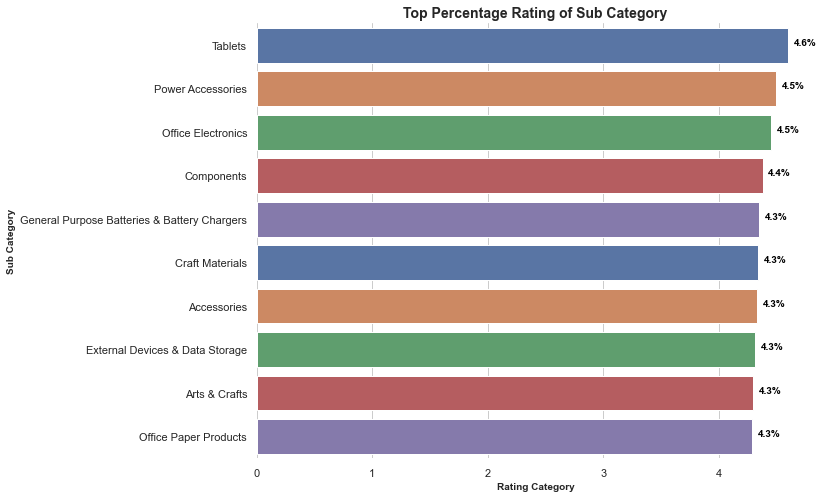

In [62]:
sns.set_style('whitegrid')
colors = sns.color_palette("deep", len(main_items))
fig, ax = plt.subplots(figsize=(10, 8))

# create a vertical bar plot using Seaborn
sns.barplot(data=top_sub_rating, x="rating", y="sub_category", palette=colors)

ax.set_xlabel('Rating Category',  fontweight='bold', fontsize=10)
ax.set_ylabel('Sub Category',  fontweight='bold', fontsize=10)
ax.set_title('Top Percentage Rating of Sub Category',  fontweight='bold', fontsize=14)

# add annotations to the plot
for i, v in enumerate(top_sub_rating["rating"]):
    ax.text(v + 0.05, i, "{:.1f}%".format(v), color='black', fontweight='bold', fontsize=10)

plt.xticks(rotation=0)
sns.set_style("white")
sns.despine(left=True, bottom=True)
plt.show()


## Reviewers Analysis

### Most Active Reviewers

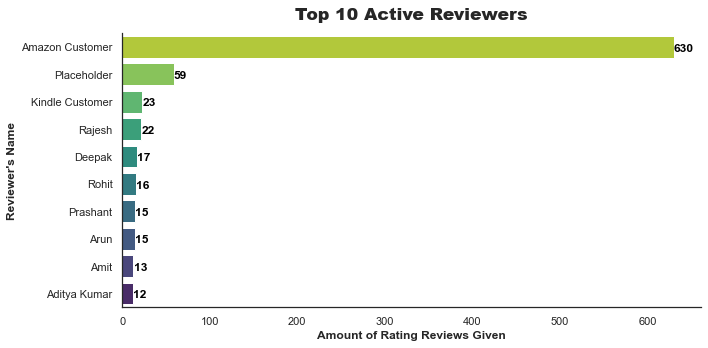

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
top_reviewer = amazon_id_name['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

# Create a bar plot with horizontal bars
sns.barplot(data=top_reviewer, x='counts', y='username', palette='viridis_r')
ax.set_xlabel('Amount of Rating Reviews Given', fontweight='bold', fontsize=12)
ax.set_ylabel("Reviewer's Name", fontweight='bold', fontsize=12)
ax.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

# Add labels for each bar with the reviewer's count
for i, v in enumerate(top_reviewer['counts']):
    ax.text(v + 0.1, i + .15, str(v), color='black', fontweight='bold', fontsize=12)

# Customize the plot's aesthetics
sns.despine()
plt.tight_layout()

# Show the plot
plt.show() 

## Observation Correlation 

### Correlation between Features

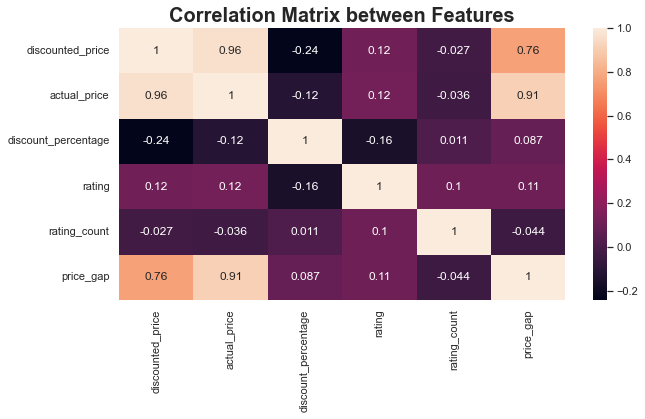

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
numeric_cols = amazon_sales2.corr()

sns.heatmap(numeric_cols, annot=True)
ax.set_title('Correlation Matrix between Features', fontweight='bold', fontsize=20)


plt.show()


### Correlation Scatter Plot between Actual Price and Discounted Price 

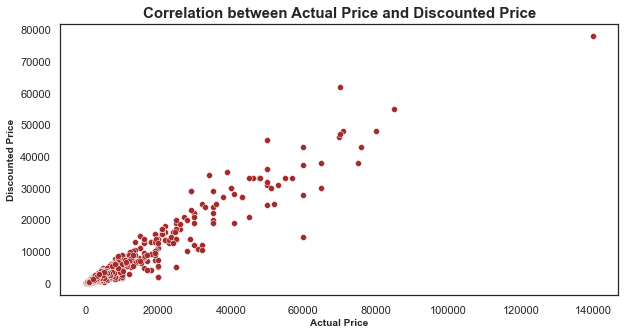

In [65]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style = 'whitegrid')  

sns.scatterplot(data=amazon_sales2, x="actual_price", y="discounted_price", color="brown")
ax.set_title('Correlation between Actual Price and Discounted Price',fontweight='bold', fontsize=15)
ax.set_xlabel('Actual Price',fontweight='bold', fontsize=10)
ax.set_ylabel('Discounted Price',fontweight='bold', fontsize=10)
ax.grid(False)

plt.show()

## Prediction

### Prediction of Discounted Price

I will try to make a simple linear regression to predict discounted price 

In [66]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title, legend):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Actual Price (Rupee)')
    plt.ylabel('Discounted Price')
    plt.legend(legend)
    
    plt.show()
    plt.close()

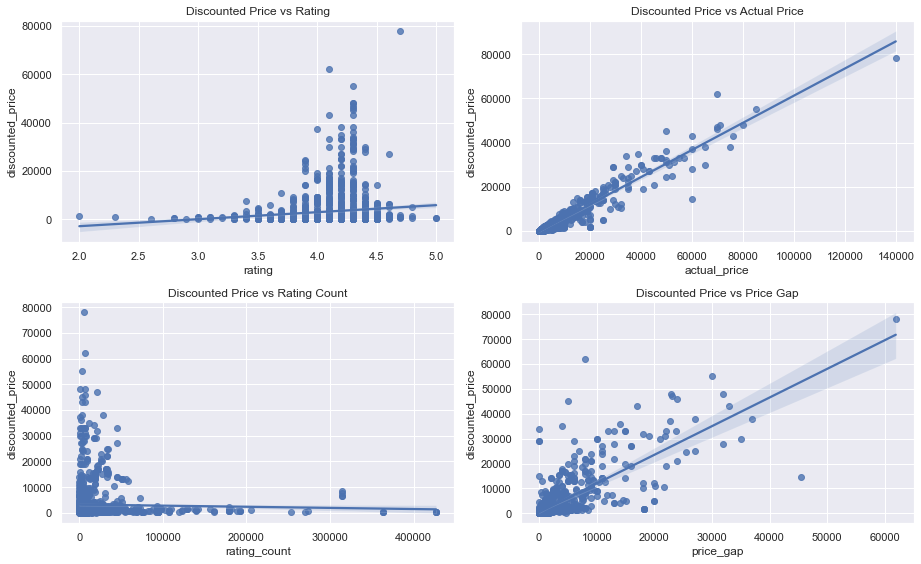

In [67]:
# I try to make scatterplot for these 4 columns () that i think would be benefical to predict discounted price, then i will look
# at these visualization to decided what feature i will use as predictor 
sns.set_style('darkgrid')

# define features and target variable
X = amazon_sales2[['actual_price', 'rating', 'rating_count', 'price_gap']]
y = amazon_sales2['discounted_price']

# create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
sns.regplot(data=amazon_sales2, x="rating", y="discounted_price", ax=axes[0, 0])
sns.regplot(data=amazon_sales2, x="actual_price", y="discounted_price", ax=axes[0, 1])
sns.regplot(data=amazon_sales2, x="rating_count", y="discounted_price", ax=axes[1, 0])
sns.regplot(data=amazon_sales2, x="price_gap", y="discounted_price", ax=axes[1, 1])

# set titles and labels
axes[0, 0].set(title='Discounted Price vs Rating')
axes[0, 1].set(title='Discounted Price vs Actual Price')
axes[1, 0].set(title='Discounted Price vs Rating Count')
axes[1, 1].set(title='Discounted Price vs Price Gap')
plt.tight_layout()
plt.show()

Based on these four visualizations, it appears that only actual price and discounted price have a strong linear relationship. The other variables do not have a strong relationship with discounted price, except for price gap. However, it is not recommended to include both actual price and price gap as predictor variables in the model since they are highly correlated with each other, and this can lead to multicollinearity issues and overfitting. Therefore, it would be better to choose actual price since it has a higher correlation in the heatmap and a strong linear relationship with discounted price.

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# define features and target variable
X = amazon_sales2[['actual_price']]
y = amazon_sales2['discounted_price']

# create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the pipeline on the training data
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Coefficients: ', pipe['regressor'].coef_)
print('Intercept: ', pipe['regressor'].intercept_)
# evaluate the pipeline on the testing data
print('R^2 score:', pipe.score(X_test, y_test))

# print results
print('MAE:', mae)
print('MSE:', mse)

Coefficients:  [6680.48379518]
Intercept:  3120.042032450897
R^2 score: 0.9518826211553252
MAE: 776.1054785472894
MSE: 2252114.7322414923


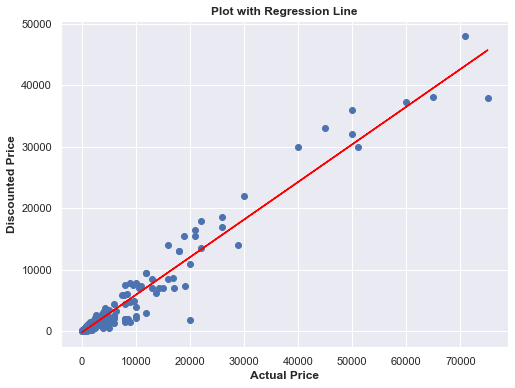

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Actual Price', fontweight='bold')
plt.ylabel('Discounted Price', fontweight='bold')
plt.title('Plot with Regression Line', fontweight='bold')


plt.show()


In [70]:
yhat_train = pipe.predict(X_train[['actual_price']])

C:\Users\USER\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


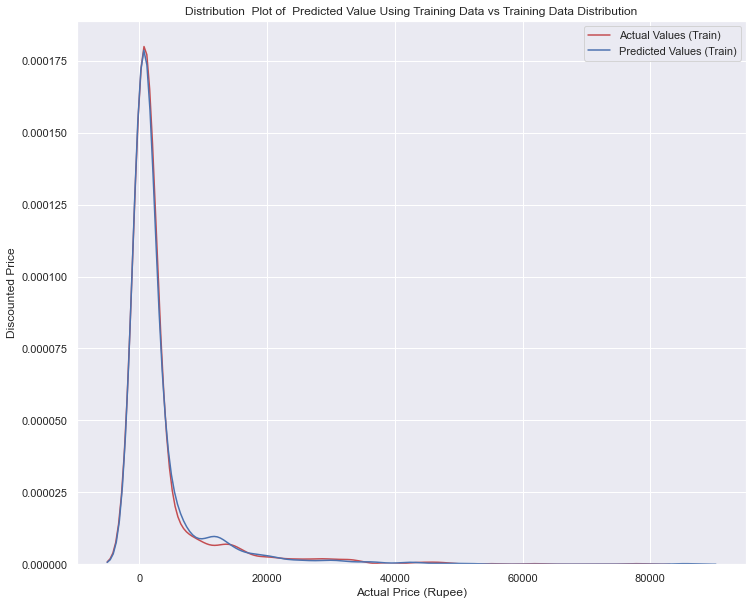

In [71]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title, ['Actual Values (Train)', 'Predicted Values (Train)'])

In [72]:
yhat_test = pipe.predict(X_test)

C:\Users\USER\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


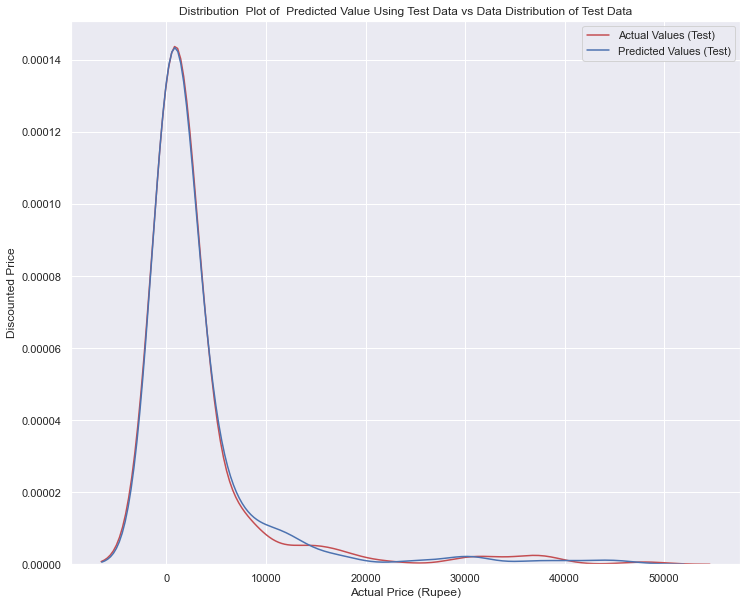

In [73]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title, ['Actual Values (Test)', 'Predicted Values (Test)'])

In [74]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=0)

cv_results = cross_val_score(pipe, X, y, cv=kf)

print('Cross Validation Results Mean: ', cv_results.mean())

Cross Validation Results Mean:  0.9150662659325519


## Model Evaluation

In [75]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)

# Create model, fit, and print results
mod_sm = sm.OLS(y,X_sm)
res_sm = mod_sm.fit()
res_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       discounted_price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.810e+04
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        20:06:19   Log-Likelihood:                -13129.
No. Observations:                1464   AIC:                         2.626e+04
Df Residuals:                    1462   BIC:                         2.627e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -219.1400     55.526     -3.947      0.000    -328.060    -110.220
actual_price     0.6142      0.005    134.545      0.000       0.605       0.623
==============================================================================
Omnibus:                      520.906   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62614.020
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                      35.016   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_white(res_sm.resid, res_sm.model.exog)

print("Lagrange multiplier statistic: " + str(lm))
print("Lagrange multiplier p-value:   " + str(lm_pvalue))
print("F-statistic:                   " + str(fvalue))
print("P-value of F-statistic:        " + str(f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05), 
# reject the null hypothesis of homoscedasticity
if lm_pvalue < 0.05:
    print("Rejected the null hypothesis. Heteroskedasticity detected")
else:
    print("Failed to reject the null hypothesis. No heteroskedasticity detected.")

Lagrange multiplier statistic: 332.861854354688
Lagrange multiplier p-value:   5.2476723229037627e-73
F-statistic:                   214.9654182755722
P-value of F-statistic:        1.4636075729743912e-82
Rejected the null hypothesis. Heteroskedasticity detected


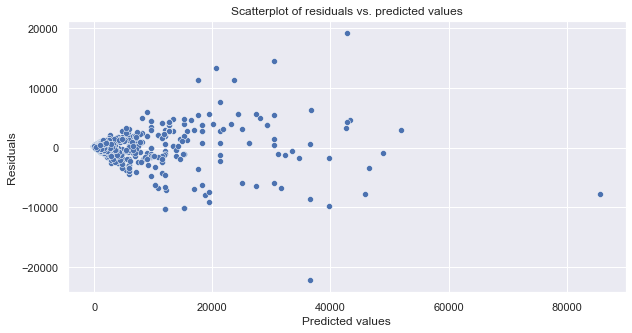

In [77]:
# Plot the residuals against the predicted values
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=res_sm.fittedvalues, y=res_sm.resid)
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Scatterplot of residuals vs. predicted values')
plt.show()


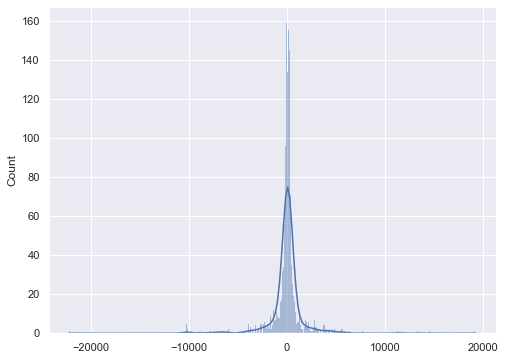

In [78]:
residuals = res_sm.resid

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.show()

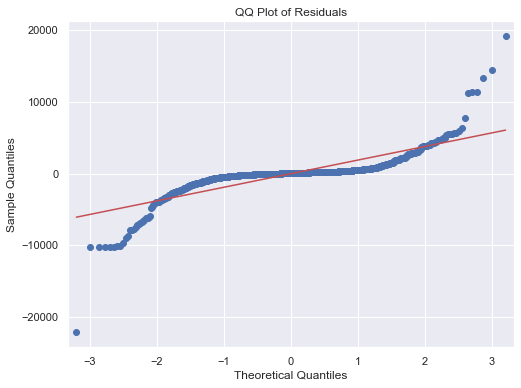

In [79]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize=(8,6))
qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()

To check for normal distribution of the error, the data points need to be close to the line. However, in this case, we can observe that there are multiple data points that are significantly distant from the line.

In [80]:
from scipy.stats import shapiro

# Get the residuals from the fitted model
residuals = res_sm.resid

# Perform Shapiro-Wilk test
stat, p = shapiro(residuals)

# Print the results
print('Shapiro-Wilk test for normality of residuals:')
print('Statistic = %.3f, p-value = %.3f' % (stat, p))

# Interpret the results
if p > 0.05:
    print('The residuals are normally distributed (fail to reject H0)')
else:
    print('The residuals are not normally distributed (reject H0)')


Shapiro-Wilk test for normality of residuals:
Statistic = 0.607, p-value = 0.000
The residuals are not normally distributed (reject H0)


The Shapiro-Wilk test showed that the residuals are not normally distributed with a p-value of 0.000, which means there is strong evidence against the assumption of normality. This assumption is important for linear regression modeling. Since the model may not accurately capture the relationship between the dependent and independent variables, caution should be taken when interpreting the results.

Based on the analysis, it can be concluded that the Simple Linear Regression Model does not meet the two key assumptions required for a successful linear regression model: 
(1) homoscedasticity 
(2) normally distributed error component. 
The White's test revealed that there is heteroskedasticity in the data, which is also apparent from the scatterplot. In addition, the histograms, quantile plots, and Shapiro-Wilk test indicate that the error component is not normally distributed. Therefore, it is not recommended to use the Simple Linear Regression Model for this dataset.

# Sentiment Analysis

In [81]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

I will use Vader model and RoBERTA model for the analysis and compare both of them resulted.

In [82]:
amazon_reviews= amazon_sales[["product_id","review_title","review_content"]]

amazon_reviews

,product_id,review_title,review_content
0,B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."
...,...,...,...
1460,B08L7J3T31,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p..."
1461,B01M6453MB,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri..."
1462,B009P2LIL4,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s..."
1463,B00J5DYCCA,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...


In [83]:
example_texts = amazon_reviews["review_title"][100]
example_texts

"Nice cover,Good quality,Dealfreez Full Wrap Silicone Remote Cover Case is an excellent product,Remote Cover,Loved it!,Soft,Best product for the price,Look's good"

In [117]:
amazon_reviews[amazon_reviews["product_id"] == "B07JW9H4J1"]

,product_id,review_title,review_content
0,B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
369,B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
614,B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...


## Step 1. VADER Sentiment Scoring

In [86]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [87]:
sia = SentimentIntensityAnalyzer()

In [88]:
sia

In [89]:
sia.polarity_scores("so good")

{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}

In [90]:
sia.polarity_scores("so bad")

{'neg': 0.791, 'neu': 0.209, 'pos': 0.0, 'compound': -0.5849}

In [91]:
sia.polarity_scores(example_texts)

{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.8655}

In [92]:
res = {}
for i, row in tqdm(amazon_reviews.iterrows(), total=len(amazon_reviews)):
    text = row["review_content"]
    myid = row["product_id"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1464 [00:00<?, ?it/s]

In [93]:
res

{'B07JW9H4J1': {'neg': 0.032, 'neu': 0.744, 'pos': 0.224, 'compound': 0.9033},
 'B098NS6PVG': {'neg': 0.01, 'neu': 0.821, 'pos': 0.169, 'compound': 0.9853},
 'B096MSW6CT': {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.6808},
 'B08HDJ86NZ': {'neg': 0.028, 'neu': 0.8, 'pos': 0.172, 'compound': 0.8316},
 'B08CF3B7N1': {'neg': 0.116, 'neu': 0.719, 'pos': 0.165, 'compound': 0.9809},
 'B08Y1TFSP6': {'neg': 0.087, 'neu': 0.573, 'pos': 0.34, 'compound': 0.6611},
 'B08WRWPM22': {'neg': 0.028, 'neu': 0.864, 'pos': 0.109, 'compound': 0.8735},
 'B08DDRGWTJ': {'neg': 0.051, 'neu': 0.801, 'pos': 0.148, 'compound': 0.9334},
 'B008IFXQFU': {'neg': 0.041, 'neu': 0.828, 'pos': 0.132, 'compound': 0.9956},
 'B082LZGK39': {'neg': 0.01, 'neu': 0.821, 'pos': 0.169, 'compound': 0.9853},
 'B08CF3D7QR': {'neg': 0.064, 'neu': 0.797, 'pos': 0.139, 'compound': 0.9236},
 'B0789LZTCJ': {'neg': 0.028, 'neu': 0.8, 'pos': 0.172, 'compound': 0.8316},
 'B07KSMBL2H': {'neg': 0.044, 'neu': 0.704, 'pos': 0.253, 'co

In [94]:
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns={'index' : 'product_id'})

vader

,product_id,neg,neu,pos,compound
0,B07JW9H4J1,0.032,0.744,0.224,0.9033
1,B098NS6PVG,0.010,0.821,0.169,0.9853
2,B096MSW6CT,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,0.116,0.719,0.165,0.9809
...,...,...,...,...,...
1345,B08L7J3T31,0.016,0.763,0.221,0.9468
1346,B01M6453MB,0.122,0.714,0.164,0.7876
1347,B009P2LIL4,0.083,0.718,0.199,0.9698
1348,B00J5DYCCA,0.061,0.882,0.057,-0.2960


In [144]:
merged = amazon_sales2.merge(vader, how="left")
merged

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,main_category,sub_category,price_gap,rating_category,neg,neu,pos,compound
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,700.0,Above Average,0.032,0.744,0.224,0.9033
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,150.0,Above Average,0.010,0.821,0.169,0.9853
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,1700.0,Average,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,370.0,Above Average,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,245.0,Above Average,0.116,0.719,0.165,0.9809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home & Kitchen,Kitchen & Home Appliances,540.0,Above Average,0.016,0.763,0.221,0.9468
1460,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home & Kitchen,Kitchen & Home Appliances,765.0,Above Average,0.122,0.714,0.164,0.7876
1461,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home & Kitchen,"Heating, Cooling & Air Quality",861.0,Average,0.083,0.718,0.199,0.9698
1462,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home & Kitchen,"Heating, Cooling & Air Quality",491.0,Above Average,0.061,0.882,0.057,-0.2960


Let's see rating vs positive, negatifie, and neutral first

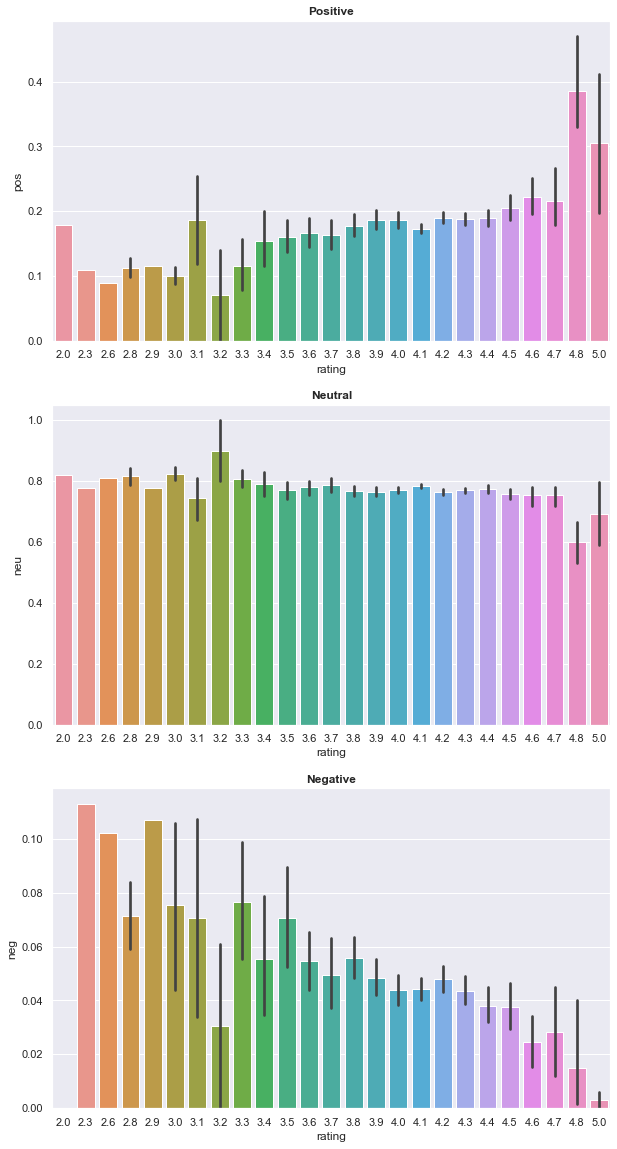

In [96]:
fig, ax = plt.subplots(3,1, figsize=(10,20))

sns.barplot(data=merged, x="rating", y="pos", ax=ax[0])
sns.barplot(data=merged, x="rating", y="neu", ax=ax[1])
sns.barplot(data=merged, x="rating", y="neg", ax=ax[2])

ax[0].set_title('Positive', fontweight = 'bold')
ax[1].set_title('Neutral', fontweight = 'bold')
ax[2].set_title('Negative', fontweight = 'bold')

plt.show()

While analyzing customer reviews, it was discovered that only one product had a rating of 2.0, and furthermore, this product did not receive any negative sentiment scores. Therefore, it may not be appropriate to rely solely on rating as an indicator of customer sentiment. To address this issue, an alternative visualization was proposed, which groups the data into rating categories. 
Upon examination of the sentiment scores across different rating categories, it was found that the positivity scores increase as the rating of the product increases. In contrast, the scores for neutral reviews remained consistent across most rating categories, with a slight dip in sentiment score at a rating of 4.8. Finally, negative sentiment scores were found to be lowest for products with the highest rating scores.

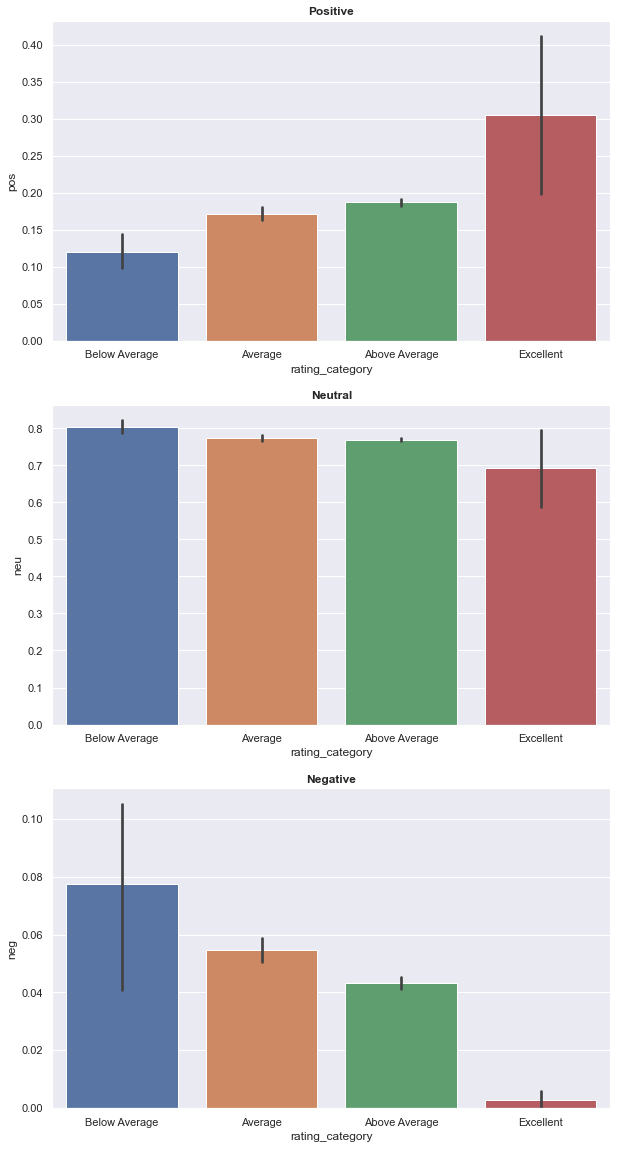

In [97]:
fig, ax = plt.subplots(3,1, figsize=(10,20))

sns.barplot(data=merged, x='rating_category', y='pos', ax=ax[0])
sns.barplot(data=merged, x='rating_category', y='neu', ax=ax[1])
sns.barplot(data=merged, x='rating_category', y='neg', ax=ax[2])

ax[0].set_title('Positive', fontweight = 'bold')
ax[1].set_title('Neutral', fontweight = 'bold')
ax[2].set_title('Negative', fontweight = 'bold')

plt.show()

In [98]:
sentiment_score = merged[['pos', 'neu', 'neg', 'compound']]
sentiment_score.describe()[1:8]

,pos,neu,neg,compound
mean,0.183488,0.770603,0.045915,0.820152
std,0.074160,0.071685,0.037692,0.367998
min,0.000000,0.465000,0.000000,-0.982100
25%,0.132000,0.727000,0.020000,0.870450
50%,0.173500,0.780000,0.041000,0.961500
75%,0.225000,0.819250,0.064000,0.988675
max,0.500000,1.000000,0.413000,0.999900


The overall reviews on this amazon sales are positive with the mean of 82%

## Vader Reviews

In [167]:
# Assuming you have 'amazon_reviews' and 'amazon_sales2' DataFrames

# Remove duplicate rows from 'amazon_reviews'
#amazon_reviews = amazon_reviews.drop_duplicates(subset='product_id')

# Remove duplicate rows from 'amazon_sales2'
#amazon_sales2 = amazon_sales2.drop_duplicates(subset='product_id')

# Perform the merge based on 'product_id'
merged3 = amazon_reviews.merge(amazon_sales2[['product_id', 'rating', 'rating_category']], on='product_id', how='left')
merged3 = merged3.merge(vader, how="left")
merged3

,product_id,review_title,review_content,rating,rating_category,neg,neu,pos,compound
0,B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,4.2,Above Average,0.032,0.744,0.224,0.9033
1,B098NS6PVG,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,4.0,Above Average,0.010,0.821,0.169,0.9853
2,B096MSW6CT,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",3.9,Average,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",4.2,Above Average,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",4.2,Above Average,0.116,0.719,0.165,0.9809
...,...,...,...,...,...,...,...,...,...
1345,B08L7J3T31,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",4.0,Above Average,0.016,0.763,0.221,0.9468
1346,B01M6453MB,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",4.1,Above Average,0.122,0.714,0.164,0.7876
1347,B009P2LIL4,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",3.6,Average,0.083,0.718,0.199,0.9698
1348,B00J5DYCCA,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,4.0,Above Average,0.061,0.882,0.057,-0.2960


In [187]:
avg_pos = merged3[merged3["rating_category"] == "Average"].sort_values("pos", ascending=False)
avg_pos["review_content"].values[0]

"1.build quality is very good2.sound quality is good3.comfortable to wear4.it is ok for calls but other person will hear your voice very heavy and sound like old radio or something5.in this price range its a very good earbuds,Can't find better than this under 1KBEST IN THIS PRICE RANGE !!,,Vry nice one of this range  ..,All over best earbuds . In this price range:)I m really happy 😊,I love to this product,This product is really good as for the money, sensor is good, lights look cool, bass is good, battery backup is also good. Best thing is its Bluetooth connectivity which is super fast. Only limitation is that it connects to only 1 device at a time. Highly Recommended.,"

In [186]:
excellent_pos = merged3[merged3["rating_category"] == "Average"].sort_values("neg", ascending=False)
excellent_pos["review_content"].values[0]

"Overall I liked the productBut disappointed with this broken item,It is useful only small cuts like kids clothes,,Today I get the product. In the accessory box the pin and saftypins are in that condition.,It's not good for beginners.It's not that simple to stich.. Sometimes the machine will stuck in the middle of stitching....,Sewing machine is really good . Easy to use and good for beginners.,Overall good item for this price. Light weight and suitable for alteration work...,"

In [185]:
blw_avg = merged3[merged3["rating_category"] == "Below Average"].sort_values("neg", ascending=False)
blw_avg["review_content"].values[0]

'I liked that it is so convenient to carry,Waste of money. Defective product, cheap quality. doesn’t blend at all,https://m.media-amazon.com/images/I/71IVsjyZ13L._SY88.jpg,First charge problemSecond motor proble,https://m.media-amazon.com/images/I/61aXXxIxPwL._SY88.jpg'